# Spelling Orthography Update

This project uses machine learning to update text from an older spelling orthography to a modern spelling orthography. The focus on this project will be on updating the spelling orthography from the 1908 Chamorro Bible.

**Name:** Schyuler Lujan<br>
**Date Started:** 6-Nov-2024<br>
**Date Completed:** In Progress<br>
**Last Updated:** 7-Nov-2024

In [2]:
# Import libraries
from bs4 import BeautifulSoup # For web scraping
import requests # For web scraping
import re # For text cleaning
import pandas as pd # For analysis
import matplotlib.pyplot as plt # For analysis

# Scrape Text Data

Scrape the text data from the chamorrobible.org website and format the text into a dataset of unduplicated words.

In [3]:
# All text can be found at this URL
website = 'http://chamorrobible.org/download/YSantaBiblia-Chamorro-HTML.htm'

In [4]:
# Get webpage and parse the HTML
page = requests.get(website)
soup = BeautifulSoup(page.content, "html.parser")

In [5]:
# Get all the text from parsed HTML
ch_bible_text = soup.get_text()

In [6]:
# Check the text
#print(ch_bible_text)

# Clean Text Data

In [7]:
# Remove numbers
text_clean = re.sub(r"\d+", " ", ch_bible_text)

In [8]:
# Remove punctuation
text_clean = re.sub(r"[^\w\s]", "", text_clean)

In [9]:
# Standardize text by converting to lowercase
text_clean = text_clean.lower()

In [10]:
# Split text by word and store in a list of duplicated words
total_word_list = text_clean.split()

# Exploratory Analysis

## Word Counts

Basic counts of the total, duplicated word count and the unduplicated word count.

In [11]:
# Get total word count
total_word_count = len(total_word_list)
print(f"The total word count: {total_word_count:,}")

The total word count: 132,875


In [12]:
# Get unique word count
unique_word_set = set(total_word_list)
unique_word_count = len(unique_word_set)
print(f"The unique word count: {unique_word_count:,}")

The unique word count: 11,193


## Word Lengths

Basic analysis to understand the length of individual words in the text.

In [47]:
# Append word lengths to a list
word_length = [len(word) for word in total_word_list]
# Convert to a dataframe
word_length_df = pd.DataFrame(word_length, columns=["WordLength"])

In [48]:
# Get descriptive statistics for word length
word_length_df["WordLength"].describe()

count    132875.000000
mean          4.725389
std           2.928984
min           1.000000
25%           2.000000
50%           4.000000
75%           7.000000
max          22.000000
Name: WordLength, dtype: float64

## Character Counts

Get a character count, and also create a dictionary of characters and their frequencies to prepare for frequency analysis.

In [16]:
characters = {} # Initialize dictionary for storing characters
total_character_count = 0 # For holding the total character count

# Character counts
for word in total_word_list:
    for char in word:
        total_character_count += 1
        if char in characters:
            characters[char] += 1
        else:
            characters[char] = 1

In [17]:
print(f"The total number of characters in the text: {total_character_count:,}")

The total number of characters in the text: 627,886


## Character Frequencies

Understand the frequency of each character used in the text, which can give us high-level information about how spelling may differ from modern orthographies.

In [50]:
# Convert dictionary to a list of tuples before converting to dataframe
character_list = [(char, characters[char]) for char in characters]

In [19]:
# Convert to dataframe and view results in descending order
character_frequency_df = pd.DataFrame(character_list, columns=["Character", "Frequency"])
# Sort dataframe by frequency
character_frequency_df.sort_values(by="Frequency", ascending=False, inplace=True)
print(character_frequency_df)

   Character  Frequency
2          a     130786
3          n      60208
9          o      47056
6          i      46099
14         e      39671
0          y      38423
12         u      34416
15         g      34305
1          s      30192
4          t      29560
10         j      28684
8          m      27442
7          l      18041
17         p       9827
11         c       9349
13         r       7984
19         d       7472
18         ñ       7411
20         f       6352
5          b       4211
23         ü       4050
16         h       3452
25         q       1023
22         v        870
27         â        646
24         á        160
26         é         85
28         ó         51
21         ú         23
29         í         18
33         x         12
30         ô          2
31         z          2
32         k          2
34         ã          1


## Word Frequencies and Lexical Diversity

Analyze word frequency in the text, which includes seeing which words are repeated versus which words are unique (used only once). This gives us a sense of the diversity vs. repetition of word usage in the text.

In [20]:
# Count the frequency of each word in the text
words = {} # Initialize dictionary to store word counts

# Iterate through the unduplicated word list and store counts for each word
for word in total_word_list:
    if word in words:
        words[word] += 1
    else:
        words[word] = 1

In [51]:
# Store words and their frequencies in a list
word_frequencies = [(word, words[word]) for word in words]

In [52]:
# Convert to a dataframe
word_frequencies_df = pd.DataFrame(word_frequencies, columns=["Word", "Frequency"])
# Sort dataframe in descending order on Frquency
word_frequencies_df.sort_values(by="Frequency", ascending=False, inplace=True)
# View top 100 words
print(word_frequencies_df.head(50))

          Word  Frequency
0            y      15477
57          ya       7730
83          na       4631
10         gui       4123
4         sija       3631
9          yan       2958
40          ni       2813
15          si       2354
181       para       1629
41          ti       1487
81          sa       1450
171      güiya       1242
39      taotao       1240
216       anae       1117
50         ayo       1087
129     ilegña       1077
130         nu       1061
52         lao       1020
53       guiya       1013
73        todo        965
153      jamyo        959
183       yuus        848
391       este        824
239        güe        818
137        pot        811
55       jeova        749
5371     jesus        681
119      guajo        668
114        nae        662
17          un        654
185       jago        599
182         as        522
90        jafa        510
97        tano        476
150          o        424
206         yo        411
531      locue        402
352       es

In [39]:
# Get descriptive statistics for total word frequencies
word_frequencies_df["Frequency"].describe()

count    11193.000000
mean        11.871259
std        189.451212
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max      15477.000000
Name: Frequency, dtype: float64

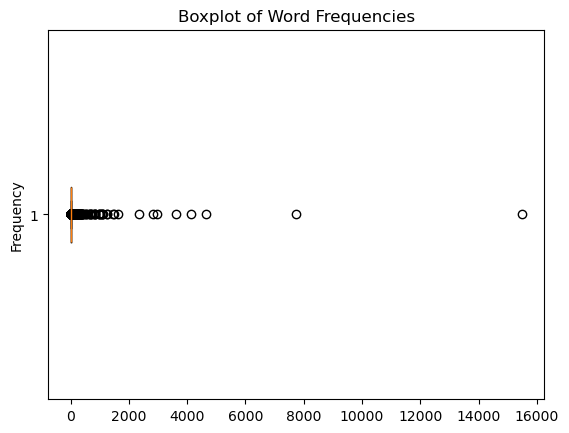

In [53]:
# Visualize word frequencies with a boxplot
plt.boxplot(word_frequencies_df["Frequency"], vert = False)
plt.title("Boxplot of Word Frequencies")
plt.ylabel("Frequency")
plt.show()

Our text contains words that are repeated at a higher than usual frequency than most other words in the text, with one word repeated almost 16,000 times in the text. Given this boxplot distribution, we will split the text into two groups for further analysis: Unique words and repeated words. <p>

Additionally, we must take these outliers into consideration when choosing our random sample for creating the training set. Their high frequency indicates they are important to the text overall, but we don't want the model to overfit based upon them.

### Non-Repeated Words

We will analyze the words used only once in the text. See how many words are only used once and their proportion of the overall text (both unique words and total words) to get a sense for lexical diversity in the text. We will also analyze the word lengths and compare with repeated words to identify any similarities or notable differences between the groups.

In [23]:
# Create a dataframe of non-repeated words
not_repeated_df = word_frequencies_df[word_frequencies_df["Frequency"] == 1]

# Count the number of words ocurring only once
total_not_repeated = len(not_repeated_df)
print(f"Total words occuring once: {total_not_repeated:,}")
print(f"Unique words are {(total_not_repeated / unique_word_count)} of the unique word set")
print(f"Unique words are {(total_not_repeated / total_word_count)} of the total word set")

Total words occuring once: 6,207
Unique words are 0.5545430179576522 of the unique word set
Unique words are 0.04671307619943556 of the total word set


Unique words are less than 5% of the total words used in the text, which indicates a high amount of repetition in the text. However, these words are over half of the unique word count, which shows us that there is still a variety of vocabulary used in the text. Both of these characteristics are consistent with the nature of the text, since it is a domain-specific religious text which is likely to have repeated themes, messages and imagery.

In [55]:
# Analyze word length of non-repeated words
not_repeated = list(not_repeated_df["Word"])
not_repeated_char_length = [len(word) for word in not_repeated]
# Convert to dataframe and get descriptive statistics
not_repeated_char_length_df = pd.DataFrame(not_repeated_char_length)
not_repeated_char_length_df.describe()

,0
count,6207.000000
mean,9.334944
std,2.692078
min,1.000000
25%,8.000000
50%,9.000000
75%,11.000000
max,22.000000


Word length is uniformly distributed, as the mean and median are roughly the same.

### Repeated Words

In [24]:
# Create a dataframe of repeated words
repeated_words_df = word_frequencies_df[word_frequencies_df["Frequency"] > 1]
# Count the number of repeated words
total_repeated = len(repeated_words_df)
print(f"Total words repeated: {total_repeated:,}")
print(f"Repeated words are {total_repeated / unique_word_count} of the unique word set")
print(f"Repeated words are {(total_word_count - total_not_repeated) / total_word_count} of the total word set")

Total words repeated: 4,986
Repeated words are 0.4454569820423479 of the unique word set
Repeated words are 0.9532869238005645 of the total word set


In [25]:
# Get descriptive statistics for Frequency on repeated words
repeated_words_df["Frequency"].describe()

count     4986.000000
mean        25.404733
std        283.286989
min          2.000000
25%          2.000000
50%          4.000000
75%          8.000000
max      15477.000000
Name: Frequency, dtype: float64

The median is much lower than the mean, which means that the distribution of repeated words is skewed to the right and that there are a small number of high frequency words that are pulling up the mean.

Text(0.5, 0, 'Word Frequency')

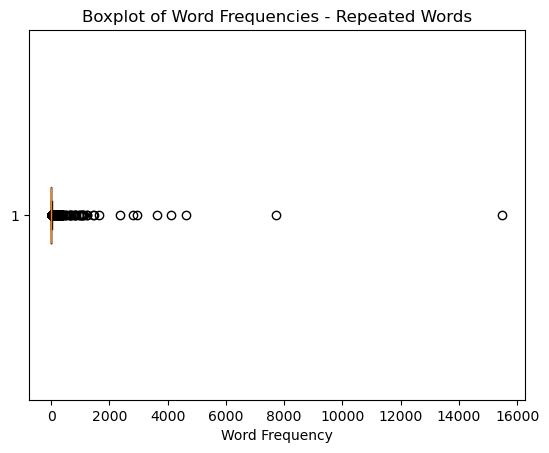

In [61]:
# Visualize distribution of frequency of repeated words with a boxplot
plt.boxplot(repeated_words_df["Frequency"], vert = False)
plt.title("Boxplot of Word Frequencies - Repeated Words")
plt.xlabel("Word Frequency")

In [56]:
# Analyze word length of repeated words
repeated = list(repeated_words_df["Word"])
repeated_words_char_length = [len(word) for word in repeated]
# Convert to dataframe and get descriptive statistics
repeated_words_char_length_df = pd.DataFrame(repeated_words_char_length)
repeated_words_char_length_df.describe()

,0
count,4986.000000
mean,7.951063
std,2.427114
min,1.000000
25%,6.000000
50%,8.000000
75%,9.000000
max,18.000000


The distribution of word length for repeated words is uniform, as the mean and median are roughly the same. Average word length for unique words and repeated words are also about the same, although there are some unique words which are slightly longer. But overall, there appear to be no major differences in word length between the two groups.

# Create Training Set

Currently, there is no labelled dataset available to train our models. Therefore, I will need to manually create a dataset of sample pairs for training these models. The dataset will come from the unique word set, and the chosen words will be mapped to their new orthography equivalent.<p>
    
**Size of Sample** <br>
    
I will start with 10% of the total unique words in the text. Although more data is always better, since I must manually create the labelled training set, I will start with 10% to minimize unnecessary, manual work.<p>
    
**Creating a Representative Sample: Stratified Sampling**<br>

To ensure a representative sample of words in our training set, I will create a stratified random sample by word frequency. The reasoning for choosing this sampling method is to prevent over-fitting based upon the highest frequency words and ensure that the model will perform well on both high-frequency and low-frequency words. <p>
    
To create this stratified random sample, I will divide the unique word dataset into different groups based on word frequency. Then I will randomly sample from these groups to create our entire sample set. This will ensure that different categories of words, based upon word frequency, are represented in our sample. <p>
    
The categories I will use will be as follows: <p>
    - *Outliers:* <br>
    - *High-Frequency:* <br>
    - *Medium-Frequency:* <br>
    - *Low-Frequency:*  <br>
    - *Unique:* Words that only occur once in the text
    
**Considerations for Poor Model Performance**
    
There is the possibility that the models will perform poorly on this manually created training set. Since the resource cost of increasing the sample training set is so high, I will only increase the sample size incrementally. One approach is to identify the model's lowest confidence words, detect any common patterns in these words (ie: specific affixes) and include more similarly affixed words in the sample set to improve performance

In [ ]:
# Export word frequency dataframe to CSV file, for additional reference
#word_frequencies_df.to_csv('chamorro_bible_words.csv', index=False, encoding="utf-8")

In [ ]:
# Determine the number of words needed for 10% of unique words
sample_size = int(.1 * len(unique_word_set))
print(f"Sample size: {sample_size:,}")

# Train Models

In [79]:
# Import training data

# Evaluate Model Performance

# Final Model Selection

# Export Final Dataset

# Conclusions

# Opportunities for Future Analysis